# 目录

__1. 探索性分析__  
__2. 数据清洗__  
__3. 特征工程__  
__4. 建模及评价__  
__5. 整体方法__  

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as statsMM
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from xgboost import XGBRegressor

In [26]:
pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

In [27]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [28]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137   
std     436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   
min       0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean     94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890  
std     125.338794    66.256028      61.119149    29.317331    55.

In [29]:
train.shape

(1460, 81)

In [30]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000  1458.000000  1458.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821     5.553804  1971.357779   1983.662783   100.709141   439.203704    52.619342   554.294925  1046.117970  1156.534613   
std     421.321334    42.746880    22.376841   4955.517327     1.436812     1.113740    30.390071     21.130467   177.625900   455.268042   176.753926   437.260486   442.898624   398.165820   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000     1.000000  1879.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   407.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000     5.000000  1953.000000   1963.000000     0.000000     0.000000     0.000000   219.250000   784.000000   873.500000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000     5.000000  1973.000000   1992.000000     0.000000   350.500000     0.000000   460.000000   988.000000  1079.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000     6.000000  2001.000000   2004.000000   164.000000   753.500000     0.000000   797.750000  1305.000000  1382.500000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000     9.000000  2010.000000   2010.000000  1290.000000  4010.000000  1526.000000  2140.000000  5095.000000  5095.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count  1459.000000   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000  1381.000000  1458.000000  1458.000000   
mean    325.967786      3.543523  1486.045922      0.434454      0.065202     1.570939     0.377656      2.854010      1.042495      6.385195     0.58122  1977.721217     1.766118   472.768861   
std     420.610226     44.043251   485.566099      0.530648      0.252468     0.555190     0.503017      0.829788      0.208472      1.508895     0.64742    26.431175     0.775945   217.048611   
min       0.000000      0.000000   407.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      3.000000     0.00000  1895.000000     0.000000     0.000000   
25%       0.000000      0.000000  1117.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.00000  1959.000000     1.000000   318.000000   
50%       0.000000      0.000000  1432.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     0.00000  1979.000000     2.000000   480.000000   
75%     676.000000      0.000000  1721.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.00000  2002.000000     2.000000   576.000000   
max    1862.000000   1064.000000  5095.000000      3.000000      2.000000     4.000000     2.000000      6.000000      2.000000     15.000000     4.00000  2207.000000     5.000000  1488.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000    1459.000000  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     93.174777    48.313914      24.243317     1.794380    17.064428     1.744345     58.167923     6.104181  2007.769705  
std     127.744882    68.883364      67.227765    20.207842    56.609763    30.491646    630.806978     2.722432     1.301740  
m

In [31]:
test.shape

(1459, 80)

# 探索性分析

Text(0.5, 1.0, 'Box plots of year-to-year changes in house prices')

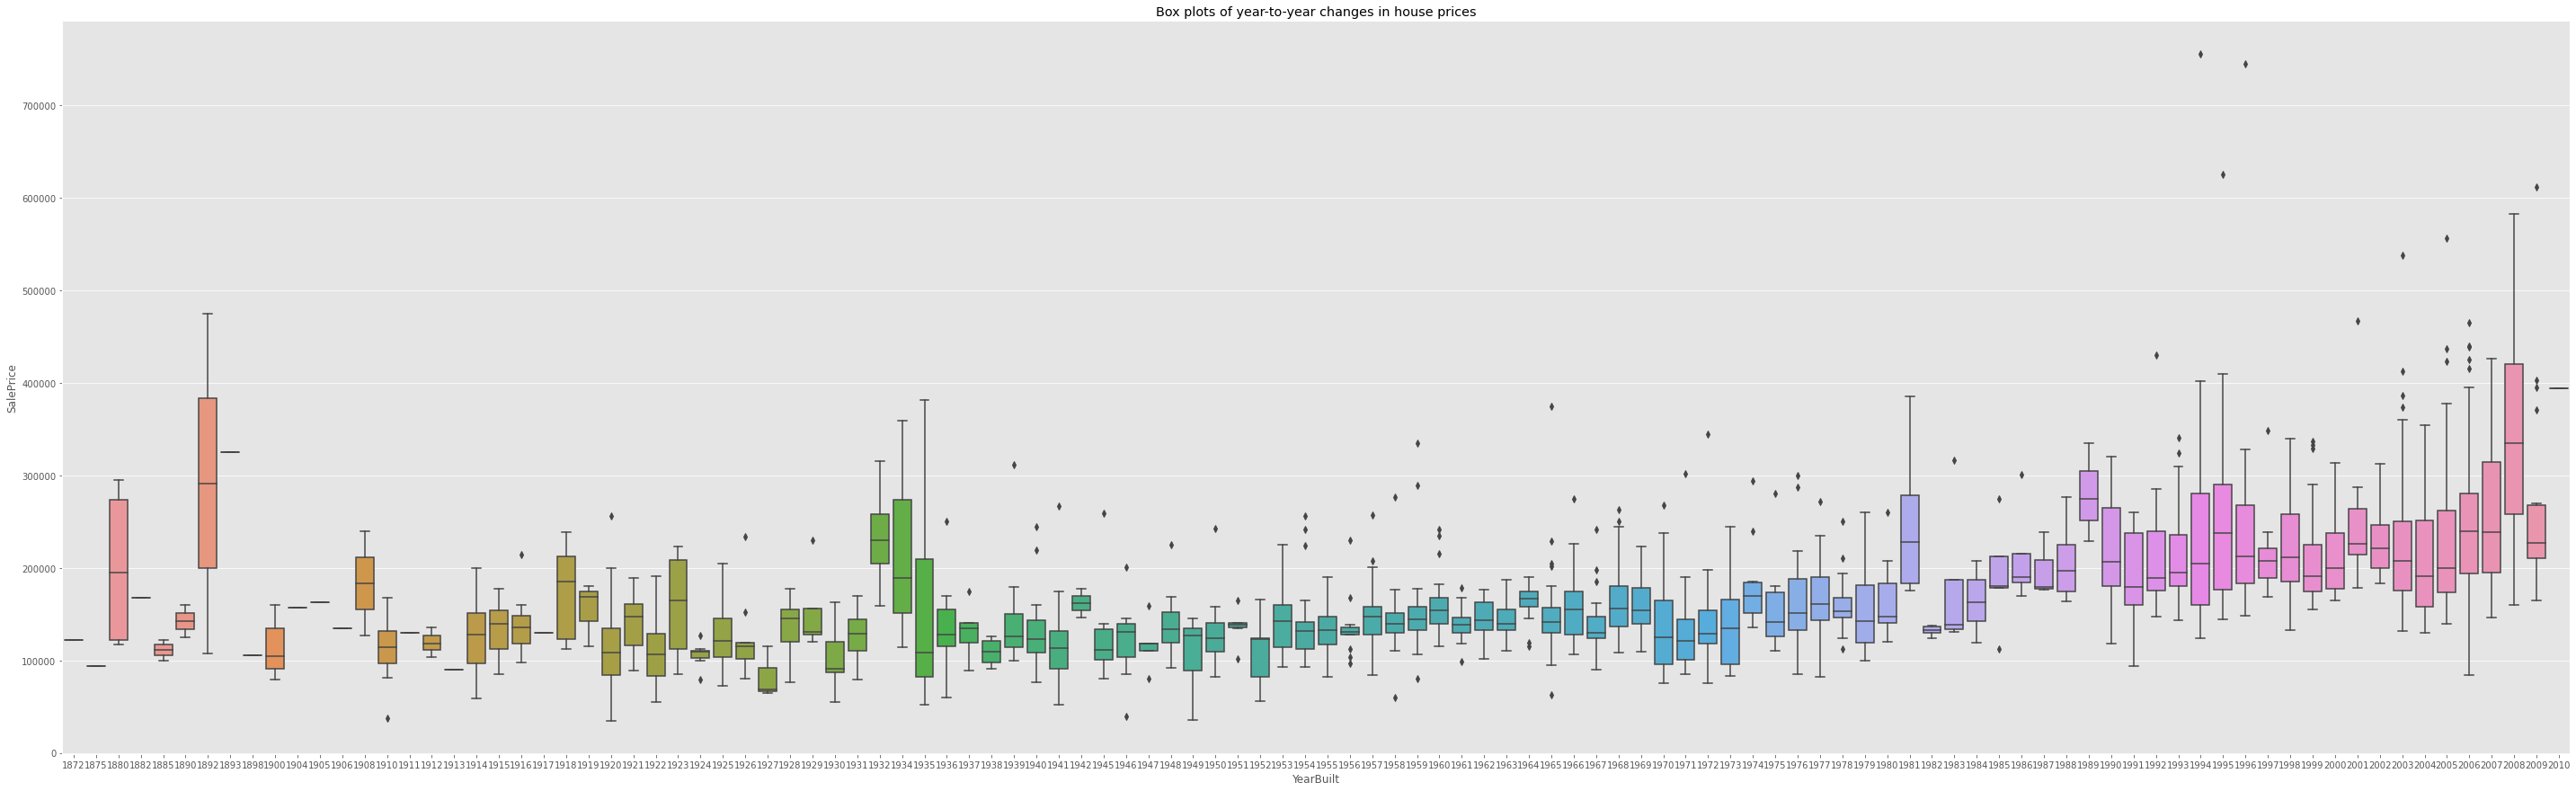

In [32]:
plt.figure(figsize=(50,15))
sns.boxplot(train.YearBuilt, train.SalePrice)
plt.title('Box plots of year-to-year changes in house prices')

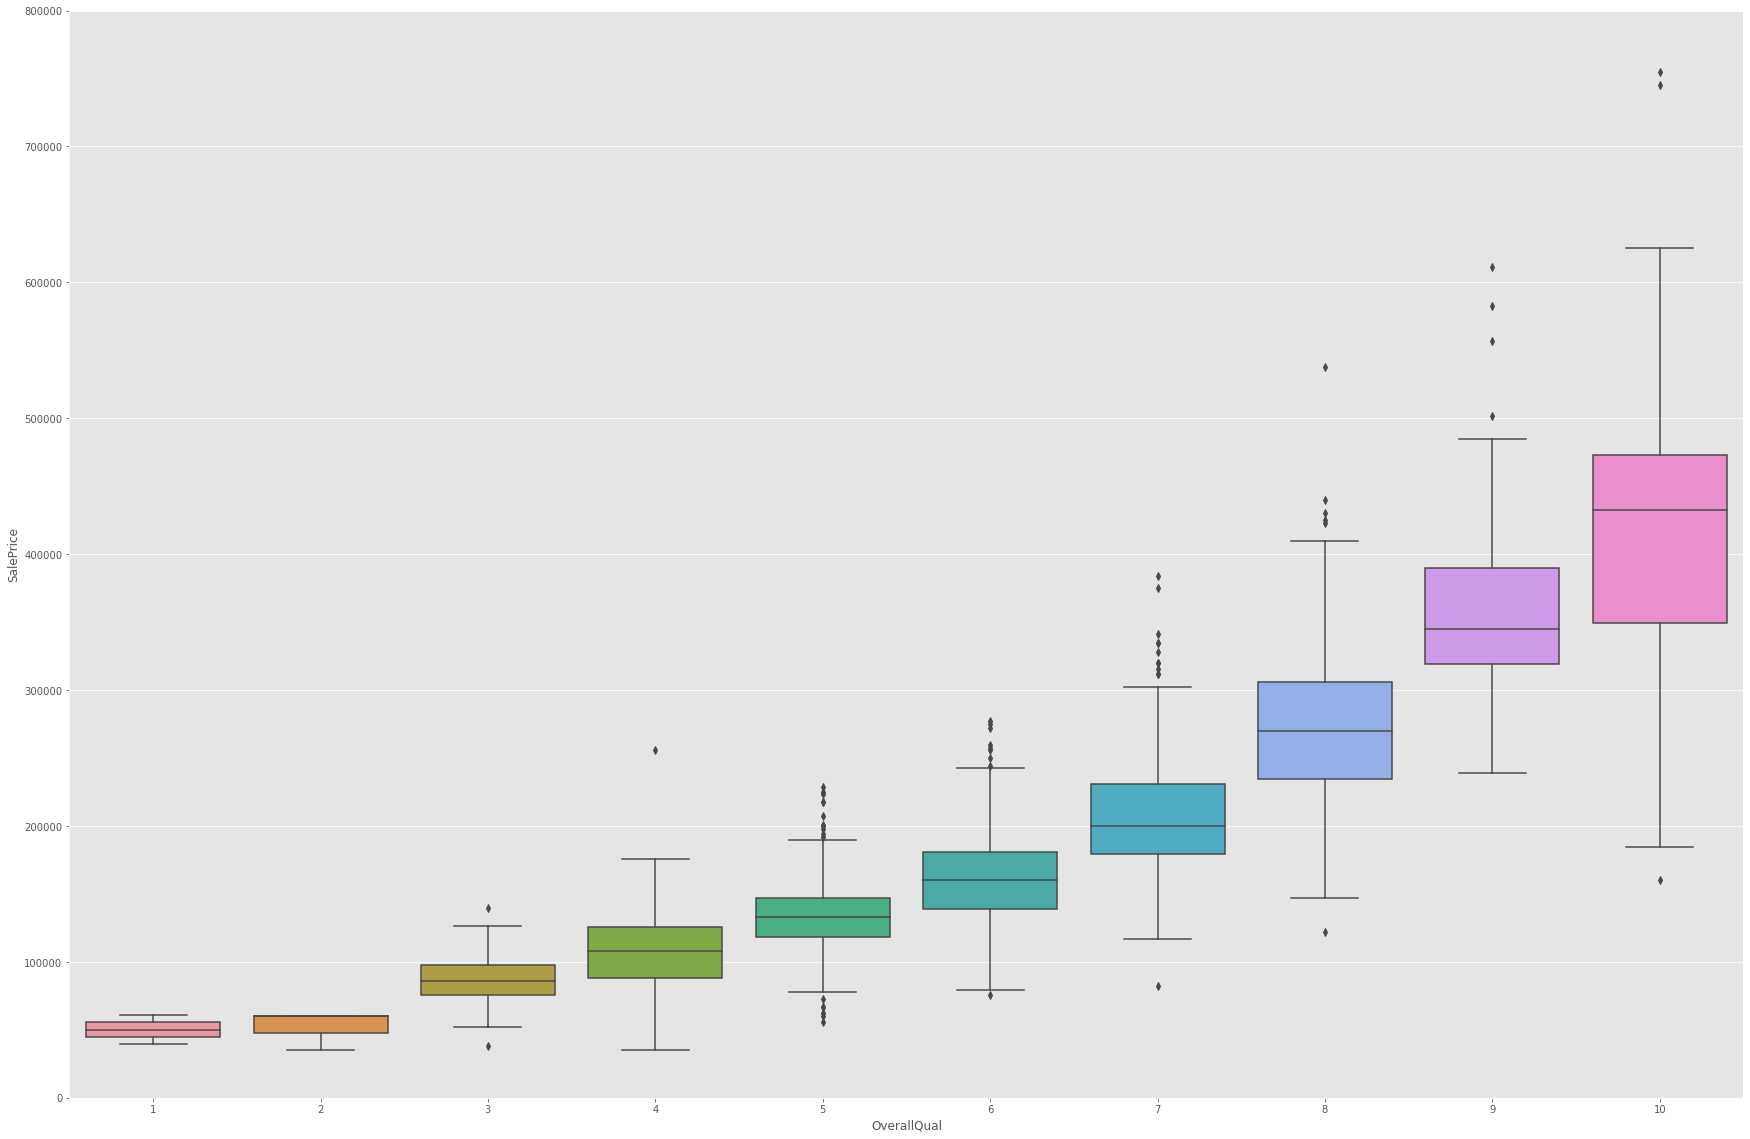

In [33]:
# 整体评价（数值特征）和价格关系
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
plt.figure(figsize=(30,20))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

+ __As is discussed in other kernels, the bottom right two two points with extremely large GrLivArea are likely to be outliers. So we delete them.__

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64


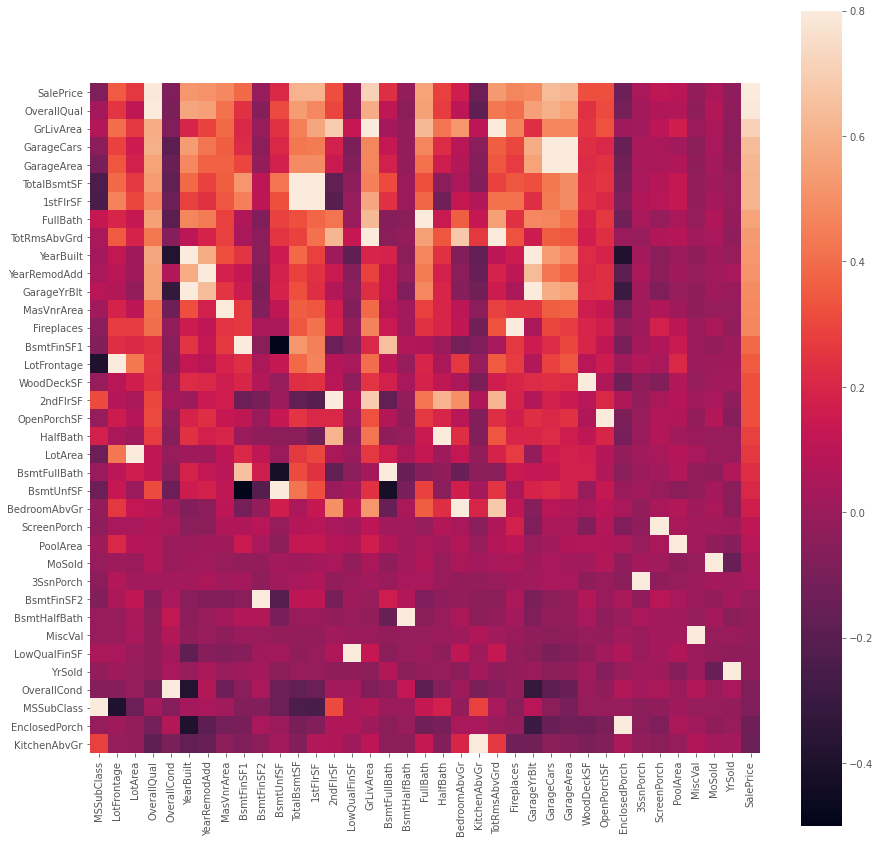

In [34]:
# 查看每一个特征对于’SalePrice’之间的影响程度
corr=train.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(2)
print(corr['SalePrice'])

# 绘制热力图颜色越深对房价影响越大
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, square=True);

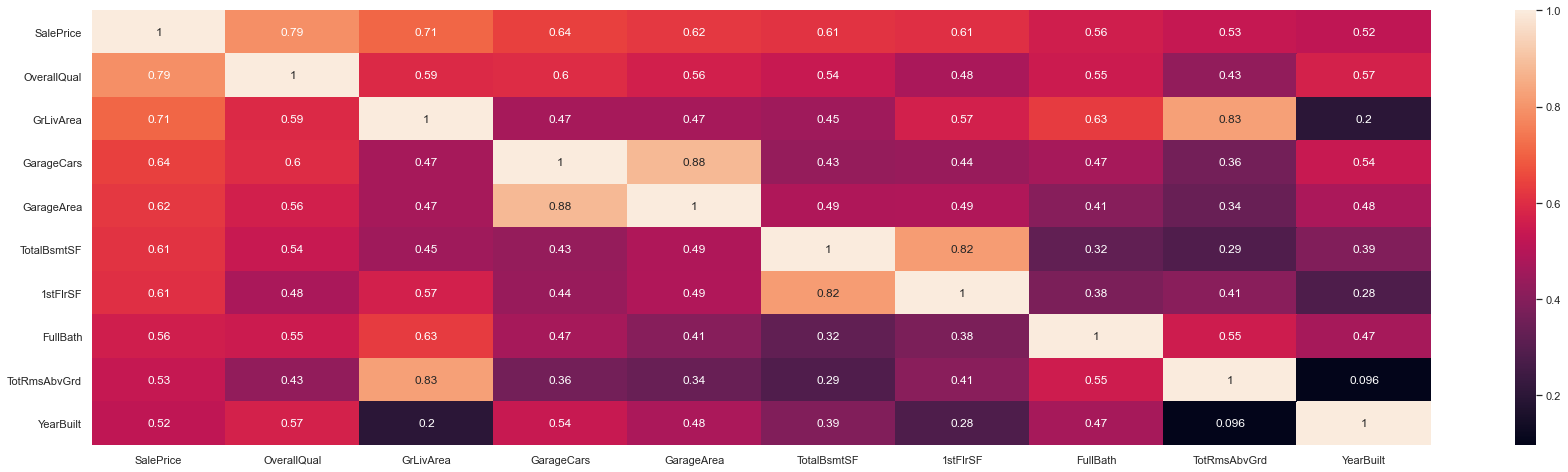

In [35]:
# 提取前十特征值重新绘图并显示相关程度
plt.figure(figsize=(30, 8))
cols =corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

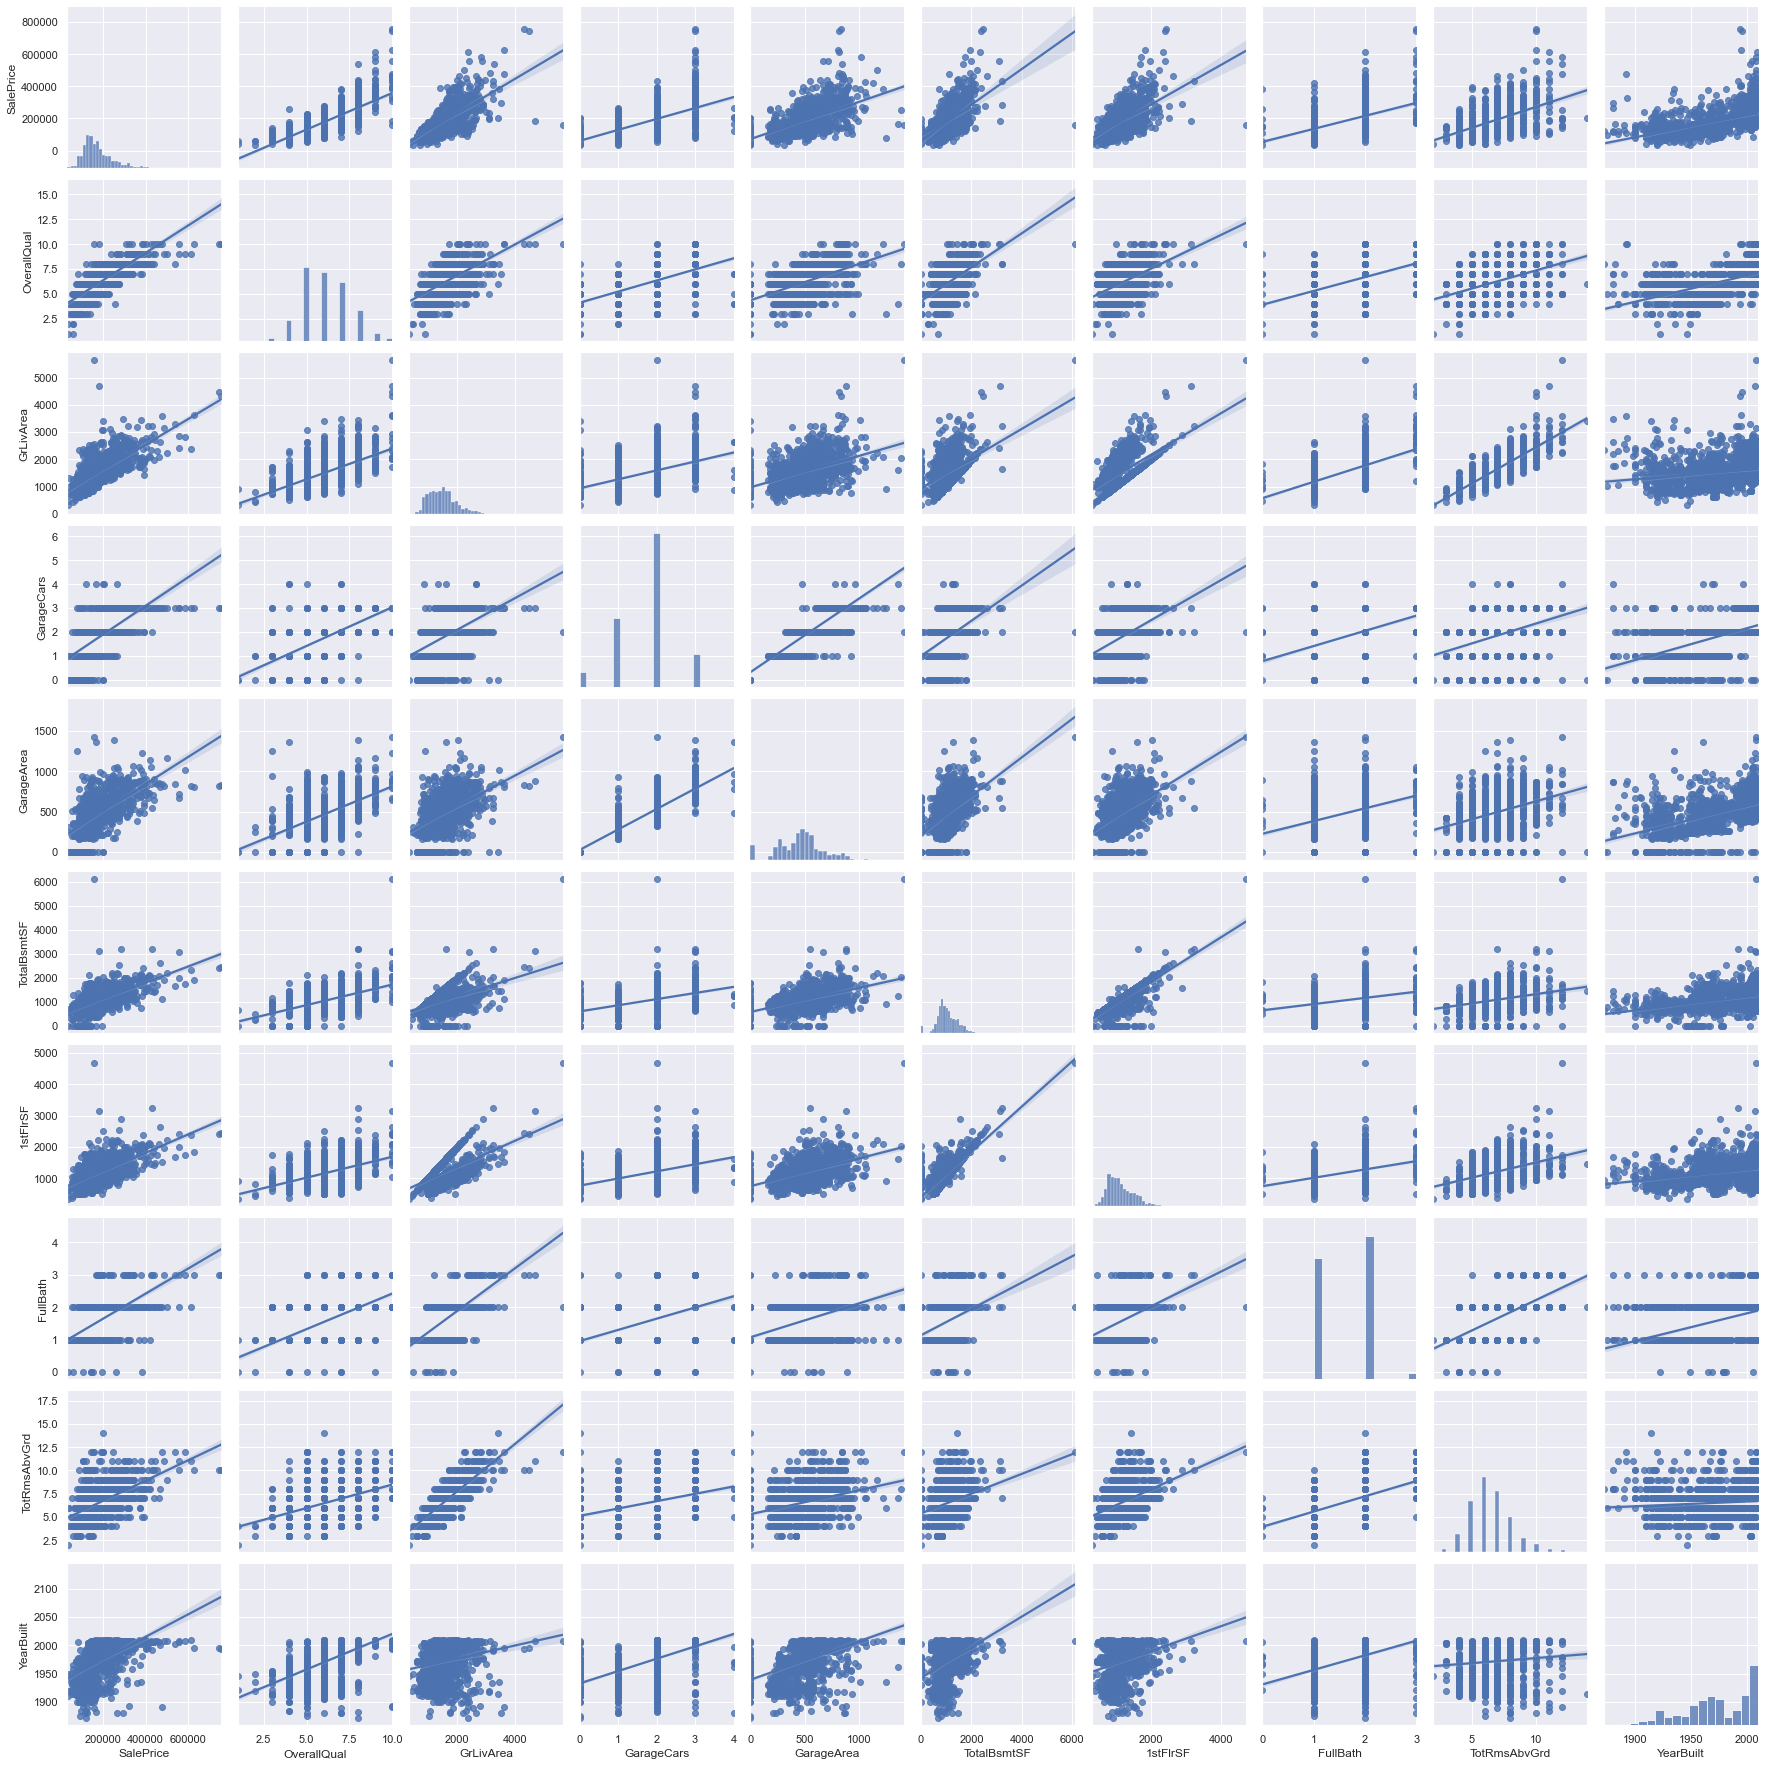

In [36]:
# 描述与价格相关度前十的特征之间的相关程度
sns.pairplot(train[corr['SalePrice'].head(10).index],kind='reg')

In [37]:
# 得到售价数值
y = train.SalePrice
train_labels = y.values.copy

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.882876
Kurtosis: 6.536282


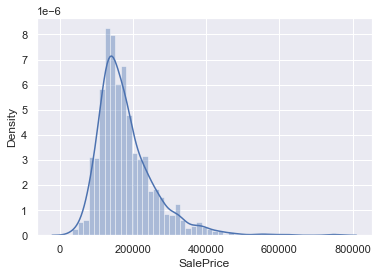

In [38]:
print(y.describe())
sns.distplot(y)
# positive skewness代表正偏态，可取对数使其满足正态分布,以便用于后期算法
print('Skewness: %f' %y.skew())
print('Kurtosis: %f' %y.kurt())

In [39]:
#得到训练集的数值特征和类别特征
num_f = [f for f in train.columns if train.dtypes[f] != 'object']#数值特征
# 删除最后一个售价
num_f.pop() 
print('numerical feature length:',len(num_f))
category_f = [f for f in train.columns if train.dtypes[f] == 'object']#训练集类别特征
print('category feature length:',len(category_f))

numerical feature length: 37
category feature length: 43


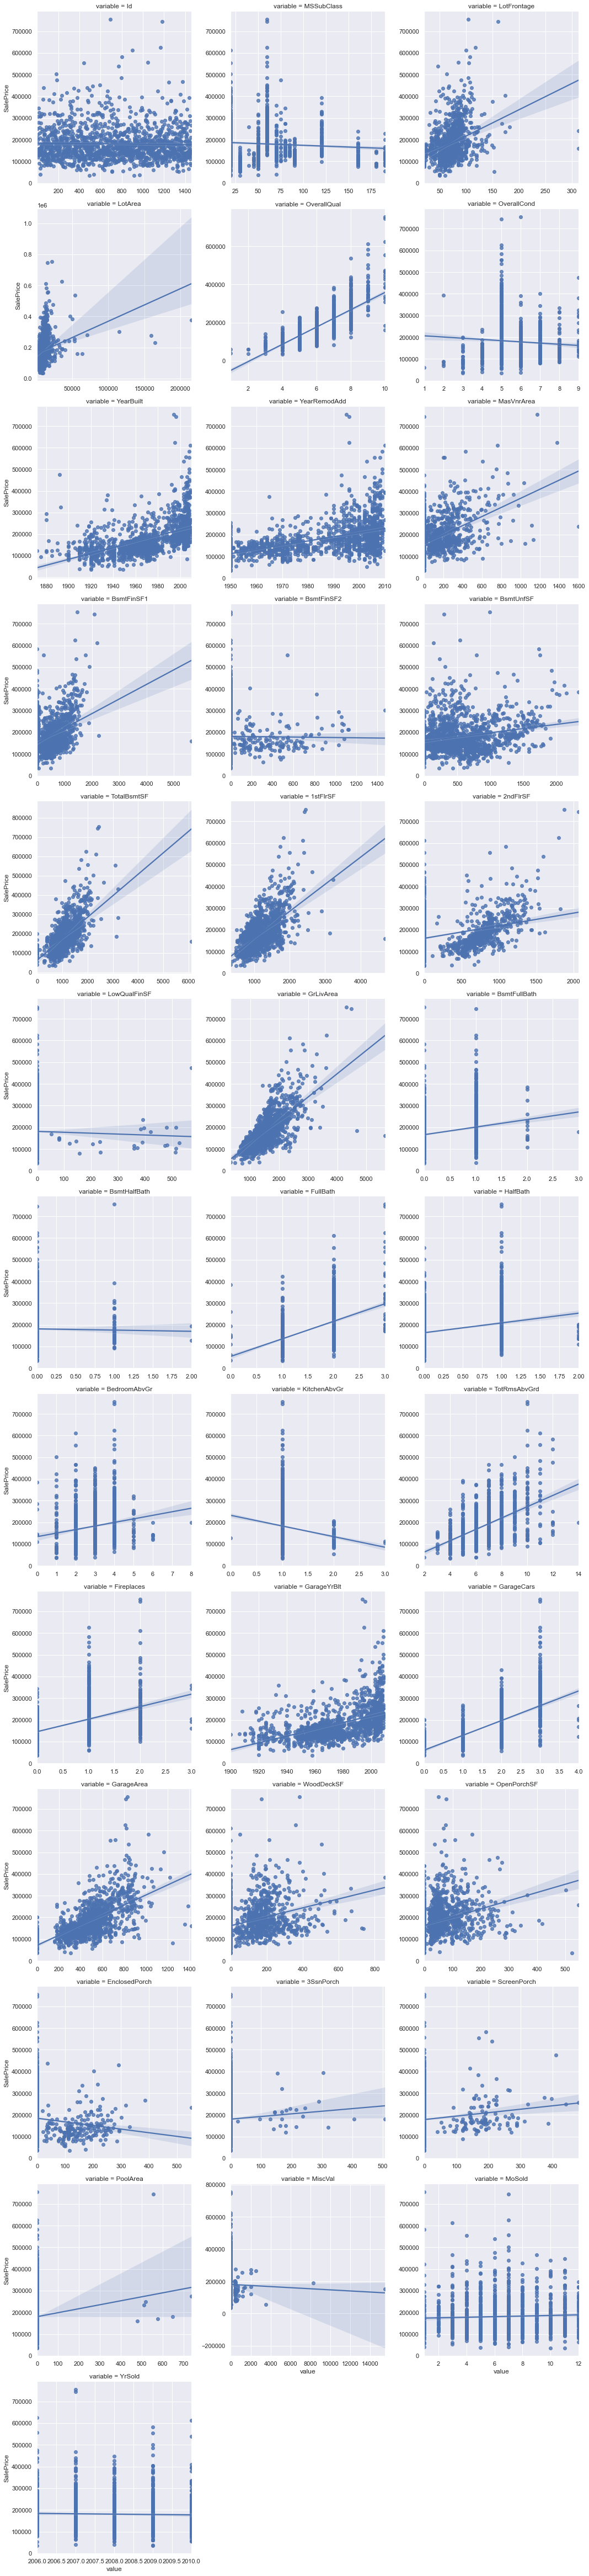

In [40]:
# 数值特征num_f分析
def jointplot(x,y,**kwargs):
    try:
        sns.regplot(x=x,y=y)
    except Exception:
        print(x.value_counts())
f = pd.melt(train, id_vars=['SalePrice'], value_vars=num_f)
g = sns.FacetGrid(f,col='variable',col_wrap=3,sharex=False,sharey=False,size=5)
g = g.map(jointplot,'value','SalePrice')

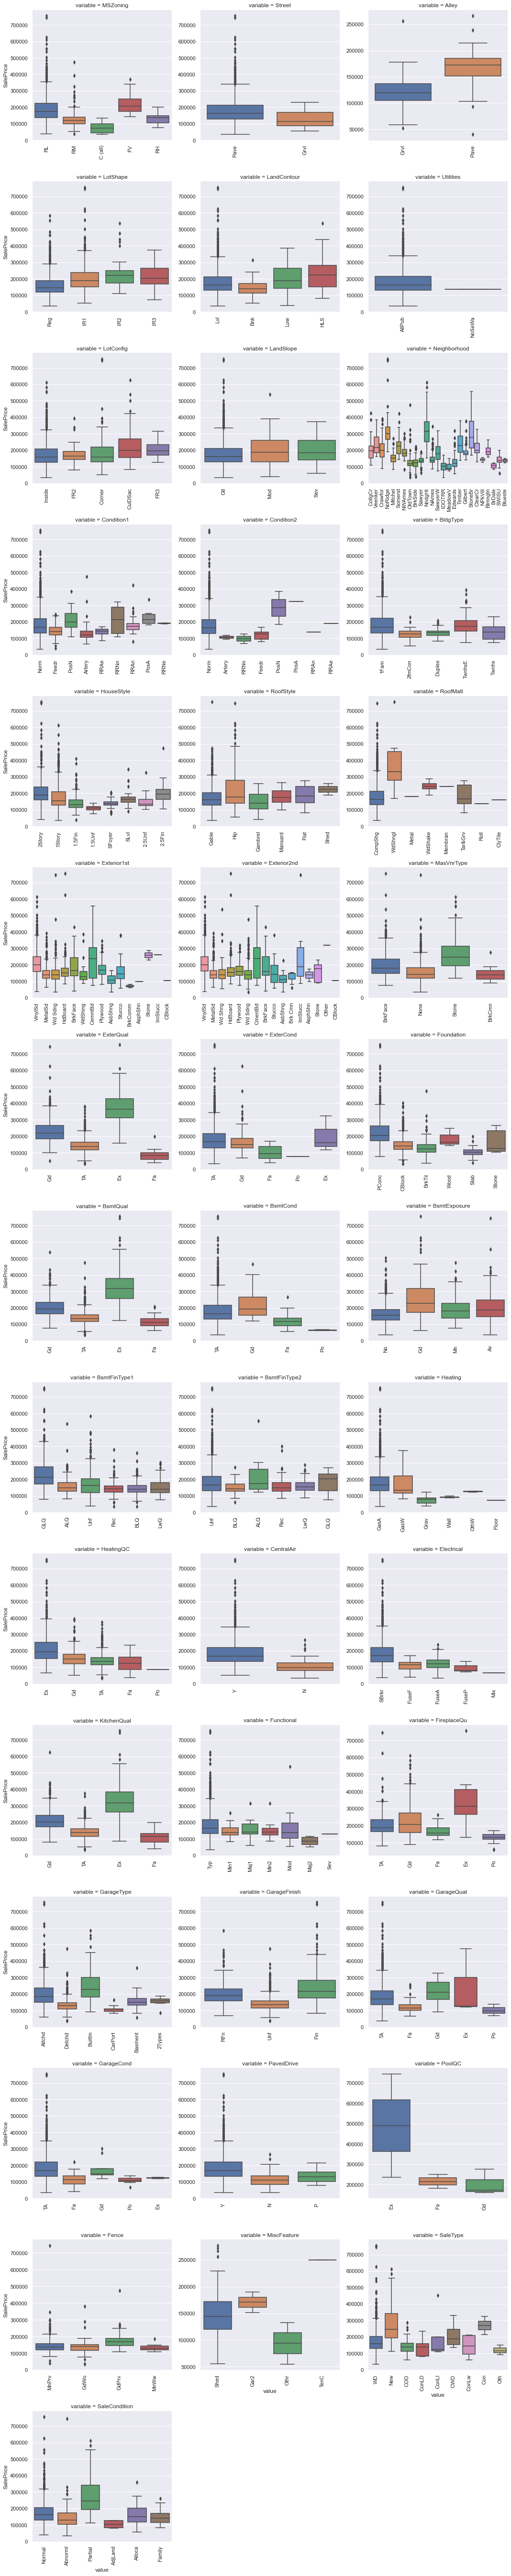

In [41]:
# Category特征总体概览
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['SalePrice'], value_vars=category_f)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False,sharey=False,size=5)
g = g.map(boxplot, "value", "SalePrice")  

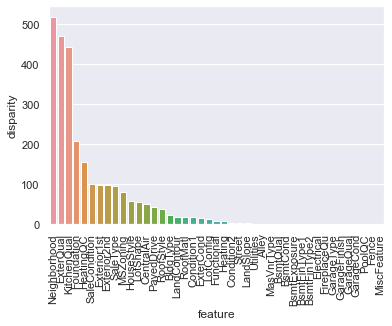

In [42]:
# Category特征单因素方差分析
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = category_f
    pvals = []
    for c in category_f:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = statsMM.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

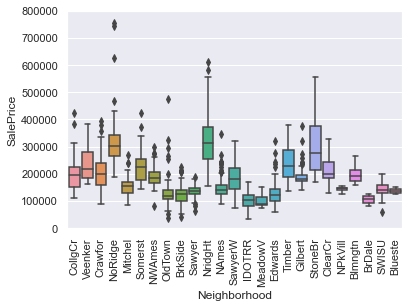

In [43]:
# Neighbourhood因素分析
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

# 数据清洗

(0.0, 800000.0)

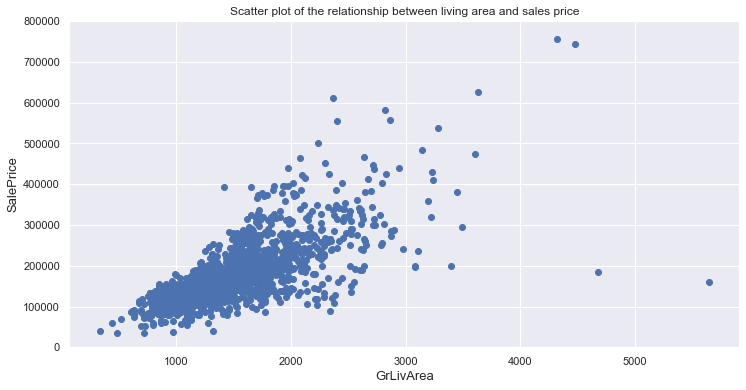

In [44]:
# 居住面积与售价关系
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.title('Scatter plot of the relationship between living area and sales price')
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

(0.0, 800000.0)

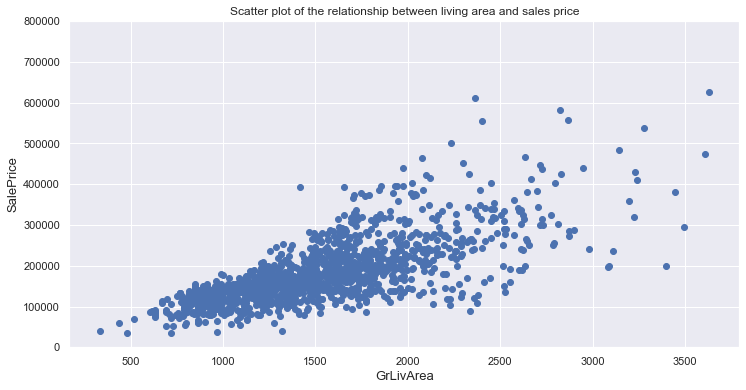

In [45]:
# 居住面积与价格呈明显的线性关系，右下角两个点面积大售价低，不符合实际规律故去掉
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<200000)].index,inplace=True)
train.drop(train[(train["GarageYrBlt"]<2000)&(train["SalePrice"]>700000)].index,inplace=True)
#查看删除结果
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.title('Scatter plot of the relationship between living area and sales price')
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [46]:
# 合并训练和测试集
full=pd.concat([train,test], ignore_index=True)

In [47]:
# 删除ID
full.drop(['Id'],axis=1, inplace=True)
full.shape

(2915, 80)

In [48]:
#数据集中有几个代表时间的特征
#分别是：房子建造的时间YearBuilt，房子改造的时间YearRemodAdd，车库建造的时间GarageYrBlt，房子售出的时间YrSold
#按照常理来说，所有的时间数据都不应该超出2021，超出2021的话就是异常值。对整个数据集的时间数据进行检索，看一下哪个特征上面出现了异常值
full.loc[full['YearBuilt']>2021,'YearBuilt']
full.loc[full['YearRemodAdd']>2021,'YearRemodAdd']
full.loc[full['GarageYrBlt']>2021,'GarageYrBlt']
full.loc[full['YrSold']>2021,'YrSold']

Series([], Name: YrSold, dtype: int64)

In [49]:
#找出我们数据集中含有缺失值的特征，并查看特征类型
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

<AxesSubplot:>

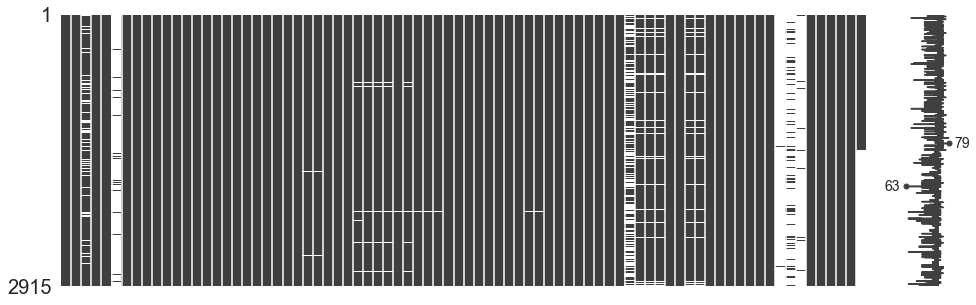

In [50]:
#绘制缺失值统计图
msno.matrix(full, figsize = (16, 5))

In [51]:
#统计缺失值比例
def missing_values_table(df):
    mis_val = df.isnull().sum() # 总缺失值
    mis_val_percent =100 * df.isnull().sum() / len(df) # 缺失值比例
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1) # 缺失值制成表格
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values',
                                                               1:'% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values',ascending=False).round(5)
    # 缺失值比例列由大到小排序
    
    print('Your selected dataframe has {} columns.\nThere are {} columns that have missing values.'.format(df.shape[1], mis_val_table_ren_columns.shape[0]))
    # 打印缺失值信息
    
    return mis_val_table_ren_columns

missing_values_table(full)

Your selected dataframe has 80 columns.
There are 35 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  2907           99.72556
MiscFeature             2810           96.39794
Alley                   2717           93.20755
Fence                   2345           80.44597
SalePrice               1459           50.05146
FireplaceQu             1420           48.71355
LotFrontage              486           16.67238
GarageCond               159            5.45455
GarageYrBlt              159            5.45455
GarageFinish             159            5.45455
GarageQual               159            5.45455
GarageType               157            5.38593
BsmtExposure              82            2.81304
BsmtCond                  82            2.81304
BsmtQual                  81            2.77873
BsmtFinType2              80            2.74443
BsmtFinType1              79            2.71012
MasVnrType                24            0.82333
MasVnrArea                23            0.78902
MSZoning                   4            0.13722
Functional                 2            0.06861
BsmtHalfBath               2            0.06861
BsmtFullBath               2            0.06861
Utilities                  2            0.06861
KitchenQual                1            0.03431
TotalBsmtSF                1            0.03431
BsmtUnfSF                  1            0.03431
GarageCars                 1            0.03431
GarageArea                 1            0.03431
BsmtFinSF2                 1            0.03431
BsmtFinSF1                 1            0.03431
Exterior2nd                1            0.03431
Exterior1st                1            0.03431
SaleType                   1            0.03431
Electrical                 1            0.03431

In [52]:
print('特征类型',full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2915 non-null   int64  
 1   MSZoning       2911 non-null   object 
 2   LotFrontage    2429 non-null   float64
 3   LotArea        2915 non-null   int64  
 4   Street         2915 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2915 non-null   object 
 7   LandContour    2915 non-null   object 
 8   Utilities      2913 non-null   object 
 9   LotConfig      2915 non-null   object 
 10  LandSlope      2915 non-null   object 
 11  Neighborhood   2915 non-null   object 
 12  Condition1     2915 non-null   object 
 13  Condition2     2915 non-null   object 
 14  BldgType       2915 non-null   object 
 15  HouseStyle     2915 non-null   object 
 16  OverallQual    2915 non-null   int64  
 17  OverallCond    2915 non-null   int64  
 18  YearBuil

In [53]:
#查看相关联属性的均值和中位数：
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        46.900000   43.0    20
Blueste        27.300000   24.0    10
BrDale         21.500000   21.0    30
BrkSide        55.789474   51.0    95
ClearCr        88.150000   80.5    20
CollgCr        71.336364   70.0   220
Crawfor        69.951807   70.0    83
Edwards        65.153409   64.5   176
Gilbert        74.207207   64.0   111
IDOTRR         62.241379   60.0    87
MeadowV        25.606061   21.0    33
Mitchel        75.144444   74.0    90
NAmes          75.210667   73.0   375
NPkVill        28.142857   24.0    21
NWAmes         81.517647   80.0    85
NoRidge        90.076923   88.5    52
NridgHt        84.184049   92.0   163
OldTown        61.777293   60.0   229
SWISU          59.068182   60.0    44
Sawyer         74.551020   72.0    98
SawyerW        70.669811   67.0   106
Somerst        64.549383   72.5   162
StoneBr        62.173913   60.0    46
Timber         81.157895   82.0    57
Veenker        72.000000   80.0    16

In [54]:
#有些特征中的缺失值与其他特征有关系，先进性分桶再填充：
#使用qcut函数对连续型特征进行分桶：
full["LotAreaCut"] = pd.qcut(full.LotArea,10)

In [55]:
#计算出对应桶内的均值和中位数：
full.groupby(['LotAreaCut'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4921.2]    35.741036   34.0   251
(4921.2, 7006.8]      55.428571   52.0   266
(7006.8, 7946.0]      62.964000   62.0   250
(7946.0, 8740.0]      67.113725   65.0   255
(8740.0, 9450.0]      69.909836   70.0   244
(9450.0, 10144.6]     74.019531   75.0   256
(10144.6, 11000.0]    73.636364   75.0   253
(11000.0, 12191.2]    83.408889   82.0   225
(12191.2, 14264.2]    84.837004   85.0   227
(14264.2, 215245.0]   92.485149   90.0   202

In [56]:
#对分类型特征的缺失值填补‘NA’
cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    full[col].fillna("None", inplace=True)

In [57]:
#对连续型特征的缺失值进行平均值或众数的填补
full['LotFrontage']=full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
full['LotFrontage']=full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

In [58]:
#有些连续特征中存在缺失值是有意义的，填补‘0’
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    full[col].fillna(0, inplace=True)

In [59]:
# 有些类别特征以数字形式给出，所以要转变成类别变量
full['MSSubClass'] = full['MSSubClass'].astype(str)
# mode指的是最常出现的值，mode()[0]指众数
full['MSZoning'] = full.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
# 重要的年份和月份应当是类别变量而不是连续变量
full['YrSold'] = full['YrSold'].astype(str)
full['MoSold'] = full['MoSold'].astype(str)
#对一些属性进行特征填补
full['Functional'] = full['Functional'].fillna('Typ') 
full['Utilities'] = full['Utilities'].fillna('AllPub') 
full['Exterior1st'] = full['Exterior1st'].fillna(full['Exterior1st'].mode()[0]) 
full['Exterior2nd'] = full['Exterior2nd'].fillna(full['Exterior2nd'].mode()[0])
full['KitchenQual'] = full['KitchenQual'].fillna("TA") 
full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0])
full['Electrical'] = full['Electrical'].fillna("SBrkr") 

In [60]:
#对missing进行检查，查看是否还有缺失值没有进行填补
full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1459
dtype: int64

(1456,)
Suitable lam is:  -0.02
Max llf is:  -16154.7


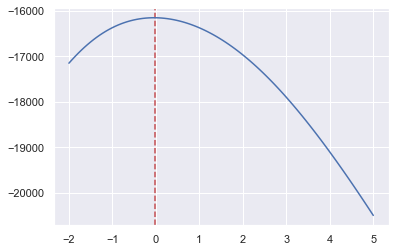

before convert:  
 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [61]:
#box-cox实现
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats,special

y = train['SalePrice']
print(y.shape)
 
lam_range = np.linspace(-2,5,100)  # default nums=50
llf = np.zeros(lam_range.shape, dtype=float)
 
# lambda estimate:
for i,lam in enumerate(lam_range):
    llf[i] = stats.boxcox_llf(lam, y)# y 必须>0
 

lam_best = lam_range[llf.argmax()]
print('Suitable lam is: ',round(lam_best,2))
print('Max llf is: ', round(llf.max(),2))
 
plt.figure()
plt.axvline(round(lam_best,2),ls="--",color="r")
plt.plot(lam_range,llf)
plt.show()

 
# boxcox convert:
print('before convert: ','\n', y.head())
#y_boxcox = stats.boxcox(y, lam_best)
y_boxcox = special.boxcox1p(y, lam_best)



# 特征工程

In [62]:
#将一些数字特征转换为类别特征。对于这些特性，我们采用LabelEncoder和get_dummies
NumStr = ["MSSubClass","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    full[col]=full[col].astype(str)

In [63]:
#根据一个特征对salesprice进行分组，并根据均值和中位数进行排序
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                     mean    median count
MSSubClass                               
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          236948.650847  215200.0   295
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52

In [64]:
#构建映射
#在特性前面添加了一个小“o”，以便保持原始特性在片刻之间使用get_dummies。
def map_values():
    full["oMSSubClass"] = full.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    full["oCondition1"] = full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFoundation"] = full.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"

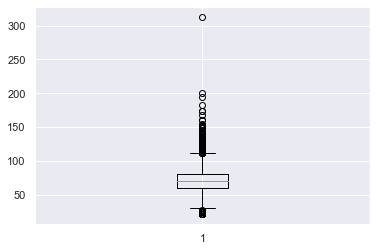

In [65]:
#map_values()
plt.boxplot((full['LotFrontage']))
plt.show()

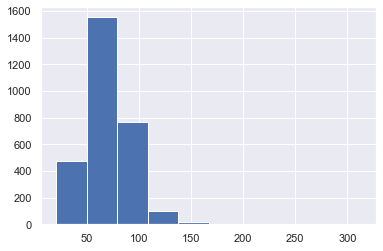

In [66]:
from matplotlib import pyplot
pyplot.hist(full['LotFrontage'])
plt.show()

In [67]:
full['LotFrontage'] = pd.qcut(full['LotFrontage'],q=5)

<function matplotlib.pyplot.show(close=None, block=None)>

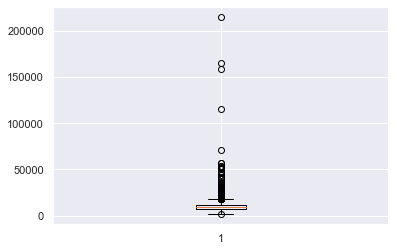

In [68]:
plt.boxplot((full['LotArea']))
plt.show

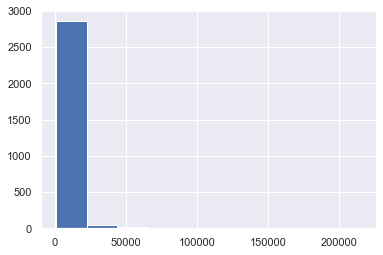

In [69]:
pyplot.hist(full['LotArea'])
plt.show()

In [70]:
full['LotArea'] = pd.qcut(full['LotArea'],q=3)

In [71]:
full['Floorfeet']=full['1stFlrSF']+full['2ndFlrSF']
full['BathRooms']=full['BsmtFullBath']+full['BsmtHalfBath']*0.5
full['BsmBath'] = full['FullBath']+full['HalfBath']*0.5

In [72]:
# drop two unwanted columns
full.drop("LotAreaCut",axis=1,inplace=True)
full.drop(['1stFlrSF'],axis=1,inplace=True)
full.drop(['2ndFlrSF'],axis=1,inplace=True)
full.drop(['BsmtFullBath'],axis=1,inplace=True)
full.drop(['BsmtHalfBath'],axis=1,inplace=True)
full.drop(['FullBath'],axis=1,inplace=True)

## Pipeline

In [73]:
#建一条Pipeline，方便试验不同的功能组合。
data = train.copy()
data = pd.get_dummies(data)
corr = data.corr().sort_values(by='SalePrice',ascending=False).round(2)
corr['SalePrice']

SalePrice                1.00
OverallQual              0.80
GrLivArea                0.72
GarageCars               0.65
TotalBsmtSF              0.65
GarageArea               0.64
1stFlrSF                 0.63
FullBath                 0.56
BsmtQual_Ex              0.55
TotRmsAbvGrd             0.54
YearBuilt                0.54
YearRemodAdd             0.52
Foundation_PConc         0.51
GarageYrBlt              0.50
KitchenQual_Ex           0.50
MasVnrArea               0.48
Fireplaces               0.47
ExterQual_Gd             0.47
ExterQual_Ex             0.46
HeatingQC_Ex             0.44
BsmtFinType1_GLQ         0.44
Neighborhood_NridgHt     0.42
GarageFinish_Fin         0.42
BsmtFinSF1               0.40
SaleType_New             0.38
SaleCondition_Partial    0.37
FireplaceQu_Gd           0.36
LotFrontage              0.36
MasVnrType_Stone         0.35
KitchenQual_Gd           0.34
GarageType_Attchd        0.34
OpenPorchSF              0.33
Exterior2nd_VinylSd      0.33
Exterior1s

In [74]:
full.groupby(['BsmtCond'])['SalePrice'].agg(['mean','median','count'])

mean    median  count
BsmtCond                                
Fa        121809.533333  118500.0     45
Gd        213599.907692  193879.0     65
None      105652.891892  101800.0     37
Po         64000.000000   64000.0      2
TA        182783.179801  165000.0   1307

In [75]:
full.groupby(['BsmtQual'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                   mean    median count
BsmtQual                               
Ex        322454.837607  318000.0   117
Fa        115692.028571  112000.0    35
Gd        202688.478964  192070.0   618
None      105652.891892  101800.0    37
TA        140759.818182  135500.0   649

In [76]:
# 保存原始数据供以后使用
gdindex1 = full['BsmtQual'] == 'Gd'
gdindex2 = full['BsmtCond'] == 'Gd'
taindex1 = full['BsmtQual'] == 'TA'
taindex2 = full['BsmtCond'] == 'TA'
exindex1 = full['BsmtQual'] == 'Ex'
exindex2 = full['BsmtCond'] == 'Ex'
faindex1 = full['BsmtQual'] == 'Fa'
poindex2 = full['BsmtCond'] == 'Po'
noneindex1 = full['BsmtQual'] == 'None'
noneindex2 = full['BsmtCond'] == 'None'
full2 = full.copy()

In [77]:
full2['BsmtQual'][gdindex1&gdindex2] = 'GG'
full2['BsmtQual'][gdindex1&taindex2] = 'GT'
full2['BsmtQual'][gdindex1&exindex2] = 'GE'
full2['BsmtQual'][gdindex1&poindex2] = 'GP'
full2['BsmtQual'][gdindex1&noneindex2] = 'GN'

full2['BsmtQual'][taindex1&gdindex2] = 'TG'
full2['BsmtQual'][taindex1&taindex2] = 'TT'
full2['BsmtQual'][taindex1&exindex2] = 'TE'
full2['BsmtQual'][taindex1&poindex2] = 'TP'
full2['BsmtQual'][taindex1&noneindex2] = 'TN'

full2['BsmtQual'][exindex1&gdindex2] = 'EG'
full2['BsmtQual'][exindex1&taindex2] = 'ET'
full2['BsmtQual'][exindex1&exindex2] = 'EE'
full2['BsmtQual'][exindex1&poindex2] = 'EP'
full2['BsmtQual'][exindex1&noneindex2] = 'EN'

full2['BsmtQual'][faindex1&gdindex2] = 'FG'
full2['BsmtQual'][faindex1&taindex2] = 'FT'
full2['BsmtQual'][faindex1&exindex2] = 'FE'
full2['BsmtQual'][faindex1&poindex2] = 'FP'
full2['BsmtQual'][faindex1&noneindex2] = 'FN'

full2['BsmtQual'][noneindex1&gdindex2] = 'NG'
full2['BsmtQual'][noneindex1&taindex2] = 'NT'
full2['BsmtQual'][noneindex1&exindex2] = 'NE'
full2['BsmtQual'][noneindex1&poindex2] = 'NP'
full2['BsmtQual'][noneindex1&noneindex2] = 'NN'

full['Bsmt_Combine'] = full2['BsmtQual']

In [78]:
full.drop(['SalePrice'],axis=1,inplace=True)

In [79]:
full[["YearBuilt","YearRemodAdd","GarageYrBlt"]] 

YearBuilt YearRemodAdd GarageYrBlt
0         2003         2003      2003.0
1         1976         1976      1976.0
2         2001         2002      2001.0
3         1915         1970      1998.0
4         2000         2000      2000.0
...        ...          ...         ...
2910      1970         1970        None
2911      1970         1970      1970.0
2912      1960         1996      1960.0
2913      1992         1992        None
2914      1993         1994      1993.0

[2915 rows x 3 columns]

In [80]:
lab=LabelEncoder()
full["YearBuilt"] = lab.fit_transform(full["YearBuilt"])
full["YearRemodAdd"] = lab.fit_transform(full["YearRemodAdd"])
full["GarageYrBlt"] = lab.fit_transform(full["GarageYrBlt"])

In [81]:
full[["YearBuilt","YearRemodAdd","GarageYrBlt"]] 

YearBuilt  YearRemodAdd  GarageYrBlt
0           110            53           94
1            83            26           67
2           108            52           92
3            25            20           89
4           107            50           91
...         ...           ...          ...
2910         77            20          103
2911         77            20           61
2912         67            46           51
2913         99            42          103
2914        100            44           84

[2915 rows x 3 columns]

In [82]:
full.shape

(2915, 78)

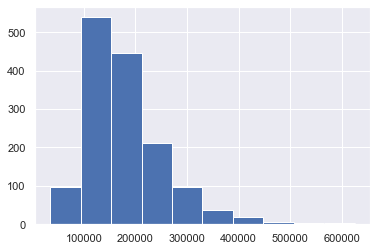

In [83]:
from matplotlib import pyplot
pyplot.hist(train['SalePrice'])
plt.show()

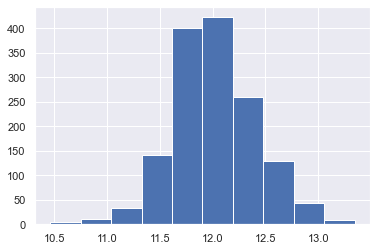

In [84]:
pyplot.hist(np.log1p(train['SalePrice']))
plt.show()

In [85]:
full = pd.get_dummies(full)

In [86]:
x_skew =full.select_dtypes(exclude=["object"]).apply(lambda x: skew(x))


In [87]:
skew_index = x_skew[abs(x_skew) >= 1].index
full[skew_index] = np.log1p(full[skew_index])

In [88]:
full.head()

OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  GrLivArea  HalfBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0            7            5        110            53    5.283204       706.0         0.0      150.0        856.0       1710         1             8           0           94         2.0       548.0   
1            6            8         83            26    0.000000       978.0         0.0      284.0       1262.0       1262         0             6           1           67         2.0       460.0   
2            7            5        108            52    5.093750       486.0         0.0      434.0        920.0       1786         1             6           1           92         2.0       608.0   
3            7            5         25            20    0.000000       216.0         0.0      540.0        756.0       1717         0             7           1           89         3.0       642.0   
4            8            5        107            50    5.860786       655.0         0.0      490.0       1145.0       2198         1             9           1           91         3.0       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  Floorfeet  BathRooms  BsmBath  MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0    0.000000     4.127134       0.000000        0.0          0.0       0.0      0.0       1710        1.0      2.5             0.0             0.0             0.0             0.0             0.0   
1    5.700444     0.000000       0.000000        0.0          0.0       0.0      0.0       1262        0.5      2.0             0.0             0.0             0.0             0.0             0.0   
2    0.000000     3.761200       0.000000        0.0          0.0       0.0      0.0       1786        1.0      2.5             0.0             0.0             0.0             0.0             0.0   
3    0.000000     3.583519       5.609472        0.0          0.0       0.0      0.0       1717        1.0      1.0             0.0             0.0             0.0             0.0             0.0   
4    5.262690     4.442651       0.000000        0.0          0.0       0.0      0.0       2198        1.0      2.5             0.0             0.0             0.0             0.0             0.0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSZoning_C (all)  MSZoning_FV  \
0              0            0.0            0.0            0.0            0.0       0.693359       0.000000            0.0            0.0            0.0            0.0               0.0          0.0   
1              1            0.0            0.0            0.0            0.0       0.000000       0.000000            0.0            0.0            0.0            0.0               0.0          0.0   
2              0            0.0            0.0            0.0            0.0       0.693359       0.000000            0.0            0.0            0.0            0.0               0.0          0.0   
3              0            0.0            0.0            0.0            0.0       0.000000       0.693359            0.0            0.0            0.0            0.0               0.0          0.0   
4              0            0.0            0.0            0.0            0.0       0.693359       0.000000            0.0            0.0            0.0            0.0               0.0          0.0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotFrontage_(20.999, 55.0]  LotFrontage_(55.0, 64.0]  LotFrontage_(64.0, 74.347]  LotFrontage_(74.347, 85.0]  LotFrontage_(85.0, 313.0]  \
0          0.0     0.693359          0.0                         0.0                  0.000000                    0.693359                    0.000000                        0.0   
1          0.0     0.693359          0

In [89]:
full.shape

(2915, 399)

In [90]:
#使用鲁棒scaler，因为可能有其他的异常值。
scaler = RobustScaler()

In [91]:
n_train=train.shape[0]
X = full[:n_train]
test_X = full[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [92]:
#特征选择
#使用Lasso模型进行功能选择，优化特性工程
ridge = Ridge()
ridge.fit(X_scaled,y_log);
Feature_ridge = pd.DataFrame({"Feature Importance":ridge.coef_}, index=full.columns)
feature_coef = Feature_ridge.copy()

In [93]:
Feature_ridge.sort_values("Feature Importance",ascending=False)

Feature Importance
LowQualFinSF_513                         0.208652
Neighborhood_StoneBr                     0.162567
Neighborhood_Crawfor                     0.143982
GrLivArea                                0.143975
MSZoning_FV                              0.133595
Functional_Typ                           0.124248
Exterior1st_BrkFace                      0.121631
MSZoning_RH                              0.108992
SaleCondition_AdjLand                    0.099396
Heating_GasW                             0.097934
MSZoning_RL                              0.096988
YearBuilt                                0.089085
RoofMatl_WdShngl                         0.088843
TotalBsmtSF                              0.086278
GarageQual_Ex                            0.083996
PoolQC_Gd                                0.083789
Functional_Min1                          0.083271
OverallQual                              0.075566
LowQualFinSF_572                         0.072245
RoofMatl_Membran                         0.071322
Neighborhood_NridgHt                     0.069655
LotConfig_CulDSac                        0.066837
SaleType_New                             0.066395
Condition1_Norm                          0.066058
KitchenAbvGr_1                           0.065506
SaleType_ConLD                           0.062936
Condition2_PosA                          0.061564
MSSubClass_70                            0.061167
KitchenQual_Ex                           0.061044
ExterCond_Ex                             0.060427
Foundation_Stone                         0.060175
BsmtExposure_Gd                          0.059913
Heating_Wall                             0.059667
Neighborhood_ClearCr                     0.058522
Utilities_AllPub                         0.056262
Neighborhood_Somerst                     0.055545
Functional_Min2                          0.051260
Exterior2nd_Wd Sdng                      0.050066
HouseStyle_2.5Unf                        0.049415
CentralAir_Y                             0.048788
MSZoning_RM                              0.048450
MiscFeature_Shed                         0.048339
LowQualFinSF_144                         0.047827
Condition1_PosN                          0.047645
Neighborhood_BrkSide                     0.046575
HouseStyle_1.5Unf                        0.045477
Neighborhood_NoRidge                     0.045402
BedroomAbvGr_6                           0.042392
BedroomAbvGr_0                           0.042047
Exterior1st_MetalSd                      0.041694
Neighborhood_Veenker                     0.040487
Condition2_Feedr                         0.040223
Functional_Maj1                          0.039448
BsmtFinType2_GLQ                         0.039055
MasVnrType_Stone                         0.038317
SaleCondition_Normal                     0.037565
OverallCond                              0.037461
LowQualFinSF_0                           0.036403
Exterior2nd_AsphShn                      0.035710
Street_Pave                              0.035603
BsmtFinType2_ALQ                         0.034614
BsmBath                                  0.033845
Exterior1st_Stucco                       0.032746
Exterior2nd_CmentBd                      0.032695
GarageType_BuiltIn                       0.032077
GarageCond_Po                            0.031417
LowQualFinSF_232                         0.031306
LowQualFinSF_473                         0.031271
Condition2_Norm                          0.030087
RoofStyle_Mansard                        0.029496
LotShape_IR3                             0.029007
GarageType_Detchd                        0.028788
Electrical_FuseA                         0.028593
Exterior1st_WdShing                      0.028558
MSSubClass_40                            0.028386
SaleType_Oth                             0.028357
LowQualFinSF_390                         0.027915
SaleType_Con                             0.027859
GarageCars                               0.027743
Condition1_RRNn                

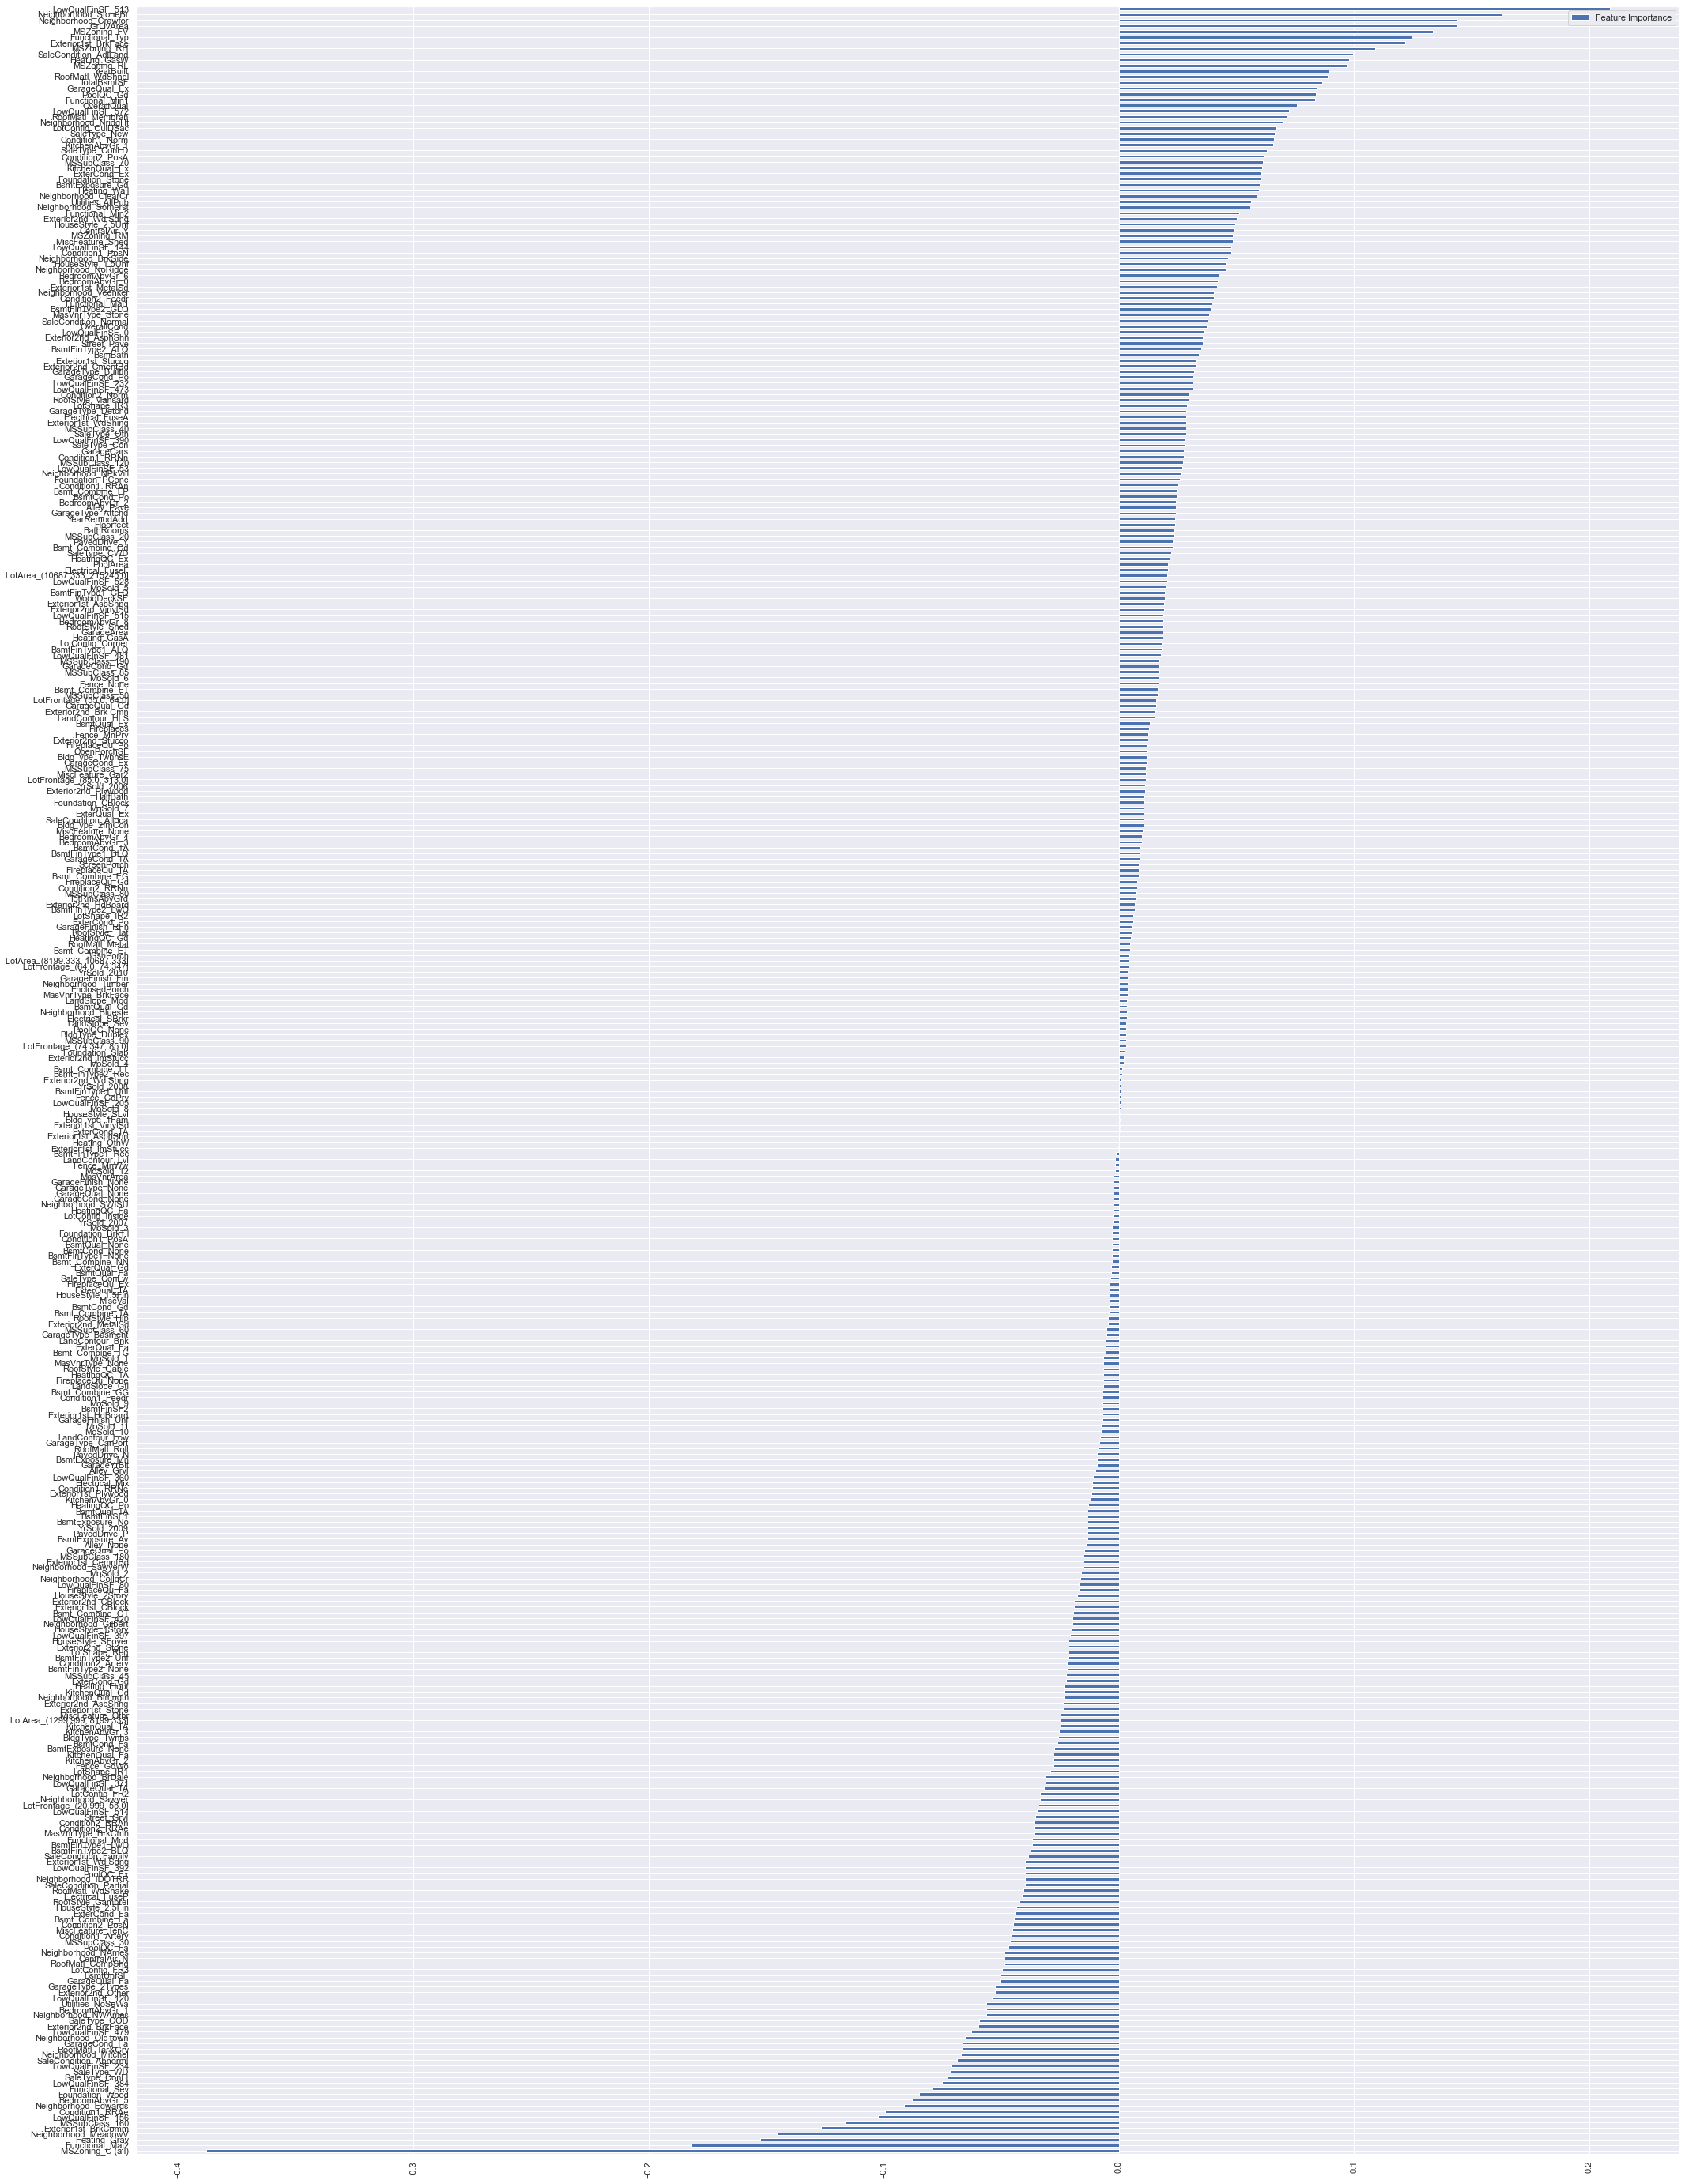

In [94]:
Feature_ridge[Feature_ridge["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(35,50))
plt.xticks(rotation=90)
plt.show()

在PCA中使用与原始数据大致相同的维度，做PCA去关联特征

In [95]:
feature_coef.shape

(399, 1)

In [96]:
df = (abs(feature_coef)>0.005).values;
full_pipe = full.iloc[:,df]

In [97]:
full_pipe.shape

(2915, 311)

In [98]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [99]:
X_scaled.shape,test_X_scaled.shape

((1456, 311), (1459, 311))

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca = PCA(n_components=300)
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [101]:
X_scaled.shape, test_X_scaled.shape

((1456, 300), (1459, 300))

# 建模及评价

In [102]:
# 定义交叉验证策略
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

我们选取12个模型，用5倍交叉校准法对这些模型进行评估。

+ Ridge
+ Lasso
+ Random Forrest
+ Gradient Boosting Tree
+ Support Vector Regression
+ Linear Support Vector Regression
+ ElasticNet
+ Stochastic Gradient Descent
+ BayesianRidge
+ KernelRidge
+ ExtraTreesRegressor
+ XgBoost

In [135]:
models = [Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [136]:
names = ["Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

Ridge: 0.115523, 0.0082
Lasso: 0.137979, 0.0053
RF: 0.147239, 0.0088
GBR: 0.135205, 0.0083
SVR: 0.133621, 0.0122
LinSVR: 0.120154, 0.0105
Ela: 0.115902, 0.0064
SGD: 0.144595, 0.0088
Bay: 0.113206, 0.0068
Ker: 0.114762, 0.0064
Extra: 0.140096, 0.0071
Xgb: 0.148958, 0.0085


In [105]:
#接下来我们做一些超参数调整。首先定义一个gridsearch方法
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

### Lasso

In [106]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

{'alpha': 0.0004, 'max_iter': 10000} 0.11532376155362871
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.115324        0.001491
1  {'alpha': 0.0005, 'max_iter': 10000}         0.116017        0.001482
2  {'alpha': 0.0007, 'max_iter': 10000}         0.117678        0.001587
3  {'alpha': 0.0006, 'max_iter': 10000}         0.116817        0.001531
4  {'alpha': 0.0009, 'max_iter': 10000}         0.118872        0.001653
5  {'alpha': 0.0008, 'max_iter': 10000}         0.118352        0.001613


### Ridge

In [107]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.11549713907123532
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.115497        0.001450
1  {'alpha': 40}         0.115880        0.001450
2  {'alpha': 45}         0.116249        0.001450
3  {'alpha': 50}         0.116605        0.001450
4  {'alpha': 55}         0.116951        0.001449
5  {'alpha': 60}         0.117285        0.001449
6  {'alpha': 65}         0.117610        0.001449
7  {'alpha': 70}         0.117926        0.001449
8  {'alpha': 80}         0.118535        0.001448
9  {'alpha': 90}         0.119115        0.001449


### SVR

In [108]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 15, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'} 0.11282808847674711
                                                           params  mean_test_score  std_test_score
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.114702        0.001575
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.113885        0.001663
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.114694        0.001582
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.113935        0.001657
4   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.114480        0.001604
5   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.113664        0.001675
6   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.114477        0.001611
7   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.113628        0.001665
8   {'C': 13, 'epsilon': 0.

### Kernel Ridge

In [109]:
param_grid={'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

{'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'} 0.11125299371703845
                                                               params  mean_test_score  std_test_score
0   {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}         0.112900        0.001536
1     {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}         0.111835        0.001523
2   {'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}         0.111253        0.001522
3   {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}         0.114500        0.001551
4     {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}         0.112994        0.001531
5   {'alpha': 0.3, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}         0.112130        0.001523
6   {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}         0.115926        0.001562
7     {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}         0.114032    

### ElasticNet

In [110]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000]})

{'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter': 10000} 0.11348843359491978
                                                    params  mean_test_score  std_test_score
0   {'alpha': 0.0005, 'l1_ratio': 0.08, 'max_iter': 10000}         0.114928        0.001900
1    {'alpha': 0.0005, 'l1_ratio': 0.1, 'max_iter': 10000}         0.114474        0.001856
2    {'alpha': 0.0005, 'l1_ratio': 0.3, 'max_iter': 10000}         0.113567        0.001621
3    {'alpha': 0.0005, 'l1_ratio': 0.5, 'max_iter': 10000}         0.114305        0.001589
4    {'alpha': 0.0005, 'l1_ratio': 0.7, 'max_iter': 10000}         0.115001        0.001520
5   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter': 10000}         0.113671        0.001752
6    {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter': 10000}         0.113488        0.001712
7    {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter': 10000}         0.114232        0.001572
8    {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter': 10000}         0.115349        0.001481
9    {

# 整体方法

In [111]:
#根据权重平均基础模型。
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # 对于每个数据点，单模型预测乘以权重，然后将它们相加
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [112]:
lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

In [113]:
# 根据它们的gridsearch得分分配权重
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [114]:
weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

In [115]:
rmse_cv(weight_avg,X_scaled,y_log),  rmse_cv(weight_avg,X_scaled,y_log).mean()

(array([0.11027503, 0.1164387 , 0.12312987, 0.10421552, 0.10771265]),
 0.11235435475856752)

In [116]:
#平均两个最好的模型，可以得到更好的交叉验证分数。
weight_avg = AverageWeight(mod = [svr,ker],weight=[0.5,0.5])

In [117]:
rmse_cv(weight_avg,X_scaled,y_log),  rmse_cv(weight_avg,X_scaled,y_log).mean()

(array([0.10908587, 0.11627811, 0.12325364, 0.10381054, 0.10669806]),
 0.11182524521256107)

In [118]:
#正常的堆叠，同时添加“get_oof”方法，之后将堆叠生成的特性和原始特性相结合
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [119]:
# 先做SimpleImputer
a = SimpleImputer().fit_transform(X_scaled)
b = SimpleImputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [120]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [121]:
print(rmse_cv(stack_model,a,b))
print(rmse_cv(stack_model,a,b).mean())

[0.10839898 0.11431772 0.12217757 0.10048188 0.10492326]
0.11005988038091061


In [122]:
#提取叠加生成的特征，并将其与原始特征进行组合。
X_train_stack, X_test_stack = stack_model.get_oof(a,b,test_X_scaled)

In [123]:
X_train_stack.shape, a.shape

((1456, 6), (1456, 300))

In [124]:
X_train_add = np.hstack((a,X_train_stack))

In [125]:
X_test_add = np.hstack((test_X_scaled,X_test_stack))

In [126]:
X_train_add.shape, X_test_add.shape

((1456, 306), (1459, 306))

In [127]:
print(rmse_cv(stack_model,X_train_add,b))
print(rmse_cv(stack_model,X_train_add,b).mean())

[0.11048309 0.11220824 0.12136934 0.10233635 0.10666674]
0.1106127512843196


In [128]:
# 最终模型
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [129]:
stack_model.fit(a,b)

stacking(meta_model=KernelRidge(alpha=0.2, coef0=0.8, kernel='polynomial'),
         mod=[Lasso(alpha=0.0005, max_iter=10000), Ridge(alpha=60),
              SVR(C=13, epsilon=0.009, gamma=0.0004),
              KernelRidge(alpha=0.2, coef0=0.8, kernel='polynomial'),
              ElasticNet(alpha=0.005, l1_ratio=0.08, max_iter=10000),
              BayesianRidge()])

In [130]:
pred = np.exp(stack_model.predict(test_X_scaled))

In [131]:
#生成CSV文件
result=pd.DataFrame({'Id':test.Id, 'SalePrice':pred})
result.to_csv("submission.csv",index=False)